# Analyse de la Base de données

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

## Traitement de la BDD

In [3]:
df = pd.read_csv('Data/Joueurs.csv', sep='|', encoding='utf-8')
pays_cont = pd.read_csv('Data/pays-continents.csv', sep=';', encoding='utf-8')
joueur = pd.merge(df, pays_cont, left_on="nationalite", right_on="Pays")
joueur['ratio_nb_select_but']=joueur['nb_buts']/joueur['nb_selections']

In [4]:
df_nationalite_j = joueur['nationalite'].value_counts()

df_country_j = joueur['Country'].value_counts()
df_country_j['United Kingdom'] = df_country_j['England'] + df_country_j['Scotland'] + df_country_j['Wales ']
df_country_j = df_country_j.drop(['England', 'Scotland', 'Wales '])

df_continent_j = joueur['Region'].value_counts()

df_poste_j = joueur['position'].value_counts()
df_poste_j['autres']=0
for i in df_poste_j.index:
    if df_poste_j[i]<10:
        df_poste_j['autres']=df_poste_j['autres']+df_poste_j[i]
        df_poste_j=df_poste_j.drop(i)

df_pied_j = joueur['pied'].value_counts()

df_club_j = joueur['club'].value_counts()

df_ligue_j = joueur['ligue'].value_counts()
df_ligue_j['autres']=0
for i in df_ligue_j.index:
    if df_ligue_j[i]<10:
        df_ligue_j['autres']=df_ligue_j['autres']+df_ligue_j[i]
        df_ligue_j=df_ligue_j.drop(i)

df_LDC_j = joueur['LDC'].value_counts()
df_LDC_j['autres']=0
for i in df_LDC_j.index:
    if df_LDC_j[i]<10:
        df_LDC_j['autres']=df_LDC_j['autres']+df_LDC_j[i]
        df_LDC_j=df_LDC_j.drop(i)

df_contrat_j = (joueur['fin_contrat'].value_counts()).sort_index(axis = 0, ascending = False)
df_contrat_j['autres']=0
for i in df_contrat_j.index:
    if df_contrat_j[i]<10:
        df_contrat_j['autres']=df_contrat_j['autres']+df_contrat_j[i]
        df_contrat_j=df_contrat_j.drop(i)

df_age_j = joueur['age'].value_counts()

df_taille_j = joueur['taille'].value_counts()

joueur['#Num'] = joueur['#Num'].astype(str)


## Statistiques Descriptives

In [8]:
joueur.describe()

,age,taille,fin_contrat,valeur_actuelle,valeur_max,montant_transfert,CDM,LDC,nb_selections,nb_buts,M49 Code,ratio_nb_select_but
count,500.000000,500.000000,498.000000,500.000000,500.000000,500.000000,500.000000,500.000000,492.000000,492.000000,500.000000,478.000000
mean,24.936000,1.822780,2025.487952,35.682000,45.832000,33.467730,0.054000,0.178000,26.640244,4.997967,453.428000,0.138590
std,3.119514,0.067412,1.413095,20.517183,28.682838,38.883441,0.226244,0.641201,26.940506,11.353691,284.813578,0.171456
min,16.000000,1.650000,2023.000000,18.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000
25%,23.000000,1.780000,2024.000000,22.000000,25.000000,7.000000,0.000000,0.000000,7.000000,0.000000,250.000000,0.000000
50%,25.000000,1.830000,2026.000000,28.000000,35.000000,22.795000,0.000000,0.000000,18.000000,2.000000,384.000000,0.083333
75%,27.000000,1.870000,2027.000000,40.000000,60.000000,45.962500,0.000000,0.000000,40.000000,5.000000,724.000000,0.214286
max,37.000000,2.000000,2031.000000,180.000000,200.000000,333.360000,1.000000,5.000000,196.000000,118.000000,998.000000,1.000000


In [9]:
joueur.groupby(['fin_contrat']).mean()

/var/folders/1z/2m76hnk913q9mvjmtv4d1tgw0000gn/T/ipykernel_2674/536865764.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  joueur.groupby(['fin_contrat']).mean()


,age,taille,valeur_actuelle,valeur_max,montant_transfert,CDM,LDC,nb_selections,nb_buts,M49 Code,ratio_nb_select_but
fin_contrat,,,,,,,,,,,
2023.0,25.905660,1.800755,27.150943,51.924528,42.482264,0.094340,0.415094,34.660377,8.528302,373.584906,0.149895
2024.0,25.789474,1.821711,35.750000,45.526316,29.614737,0.065789,0.171053,31.815789,4.868421,527.092105,0.130583
2025.0,25.320755,1.824340,37.415094,50.745283,34.752028,0.037736,0.235849,31.647619,7.228571,460.433962,0.160545
2026.0,25.039370,1.825354,34.992126,42.393701,28.819370,0.047244,0.173228,26.528455,4.032520,467.826772,0.116366
2027.0,23.743590,1.822821,37.777778,42.615385,34.373590,0.059829,0.051282,17.330435,3.086957,415.991453,0.152174
2028.0,24.066667,1.859333,42.866667,48.866667,39.486667,0.000000,0.066667,16.000000,1.857143,543.200000,0.113050
2029.0,21.500000,1.815000,45.000000,45.000000,67.750000,0.000000,0.000000,2.500000,0.000000,163.000000,0.000000
2030.0,21.000000,1.940000,40.000000,40.000000,38.000000,0.000000,0.000000,2.000000,0.000000,250.000000,0.000000
2031.0,22.000000,1.750000,40.000000,40.000000,70.000000,0.000000,0.000000,8.000000,0.000000,804.000000,0.000000


In [10]:
joueur.groupby(['CDM']).mean()

/var/folders/1z/2m76hnk913q9mvjmtv4d1tgw0000gn/T/ipykernel_2674/2538915300.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  joueur.groupby(['CDM']).mean()


,age,taille,fin_contrat,valeur_actuelle,valeur_max,montant_transfert,LDC,nb_selections,nb_buts,M49 Code,ratio_nb_select_but
CDM,,,,,,,,,,,
0,24.809725,1.824292,2025.505308,35.181818,44.257928,32.337368,0.154334,25.453763,4.716129,471.382664,0.138795
1,27.148148,1.796296,2025.185185,44.444444,73.407407,53.270000,0.592593,47.074074,9.851852,138.888889,0.135173


In [11]:
joueur.groupby(['LDC']).mean()

/var/folders/1z/2m76hnk913q9mvjmtv4d1tgw0000gn/T/ipykernel_2674/3760352794.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  joueur.groupby(['LDC']).mean()


,age,taille,fin_contrat,valeur_actuelle,valeur_max,montant_transfert,CDM,nb_selections,nb_buts,M49 Code,ratio_nb_select_but
LDC,,,,,,,,,,,
0,24.615385,1.821674,2025.540909,33.891403,41.667421,31.066437,0.047511,23.131336,3.864055,461.558824,0.133856
1,26.574468,1.830426,2025.297872,52.787234,76.893617,47.917021,0.063830,43.382979,9.595745,414.510638,0.158238
2,28.000000,1.890000,2024.000000,22.500000,42.500000,96.150000,0.000000,36.000000,15.000000,382.000000,0.245902
3,28.000000,1.810000,2024.500000,40.000000,77.500000,2.025000,0.000000,66.500000,8.500000,382.000000,0.105102
4,30.666667,1.793333,2024.000000,43.333333,101.666667,48.333333,0.666667,118.666667,35.333333,157.666667,0.218833
5,33.750000,1.850000,2024.250000,31.250000,85.000000,102.262500,0.250000,117.000000,44.500000,305.500000,0.307704


## Analyse graphique

/var/folders/1z/2m76hnk913q9mvjmtv4d1tgw0000gn/T/ipykernel_2674/1048809486.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(joueur.corr(), annot=True)


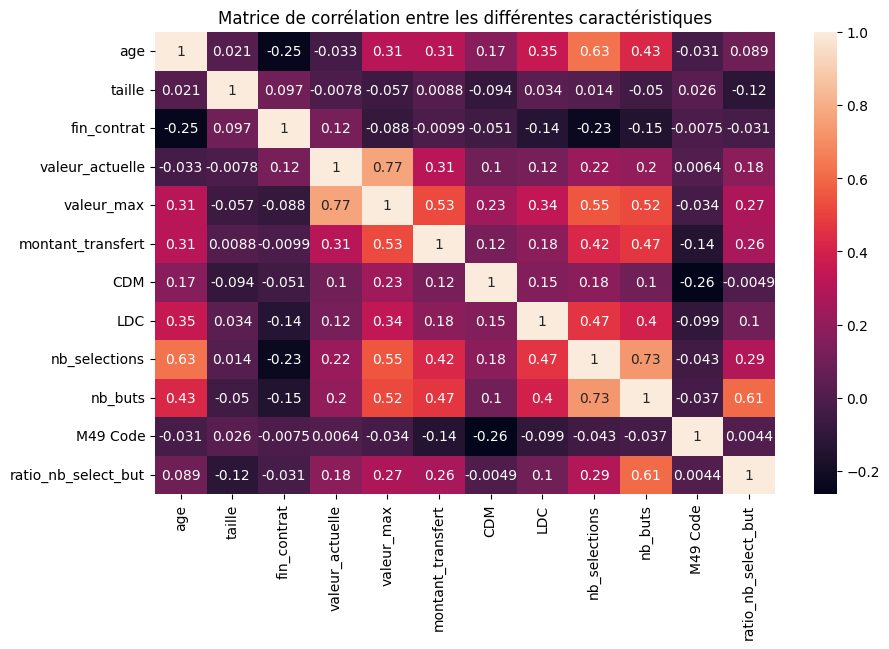

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(joueur.corr(), annot=True)
plt.title("Matrice de corrélation entre les différentes caractéristiques")
plt.show()

([<matplotlib.patches.Wedge at 0x12ff486d0>,
 [Text(1.0637016476638834, 0.28024775602516383, 'Premier League'),
  Text(0.07596592513132566, -1.0973737641382457, 'LaLiga'),
  Text(-0.7875302227854648, -0.7679818671033036, 'Bundesliga'),
  Text(-1.0973737463571076, 0.07596618199019055, 'Serie A'),
  Text(-0.787530007074479, 0.7679820883049756, 'Ligue 1'),
  Text(-0.4305108633065327, 1.012255104494447, 'Liga Portugal'),
  Text(-0.1584116827604273, 1.0885337563736872, 'autres')],
 [Text(0.5802008987257545, 0.1528624123773621, '41.8%'),
  Text(0.04143595916254127, -0.5985675077117703, '14.2%'),
  Text(-0.4295619397011626, -0.41889920023816557, '13.4%'),
  Text(-0.5985674980129677, 0.04143609926737666, '13.4%'),
  Text(-0.4295618220406248, 0.41889932089362303, '9.0%'),
  Text(-0.23482410725810873, 0.552139147906062, '3.6%'),
  Text(-0.08640637241477851, 0.5937456852947385, '4.6%')])

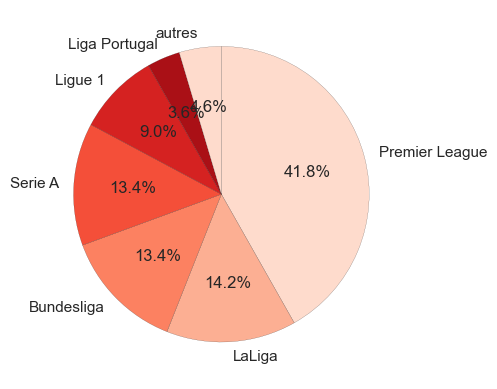

In [ ]:
plt.pie(df_ligue_j, labels=df_ligue_j.index, colors=sns.color_palette("Reds"), startangle=90, counterclock=False, wedgeprops={'linewidth': 0.1, 'edgecolor': 'black'},autopct='%1.1f%%')

Text(0, 0.5, 'nombre')

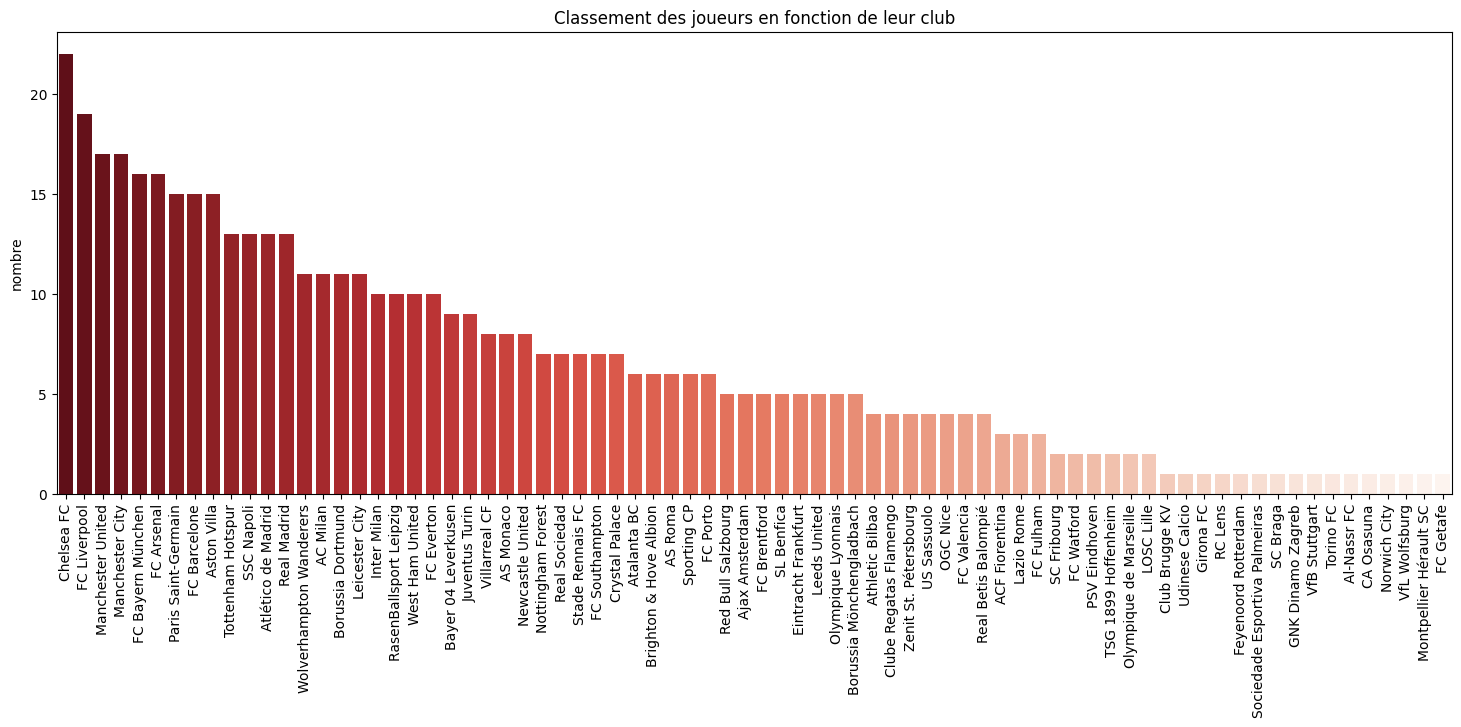

In [ ]:
plt.figure(figsize=(18,6))
plt.title("Classement des joueurs en fonction de leur club")
sns.barplot(x=df_club_j.index, y=df_club_j, palette='Reds_r')
plt.xticks(rotation=90)
plt.ylabel("nombre")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Ligue 1'),
  Text(1, 0, 'LaLiga'),
  Text(2, 0, 'Bundesliga'),
  Text(3, 0, 'Premier League'),
  Text(4, 0, 'Serie A'),
  Text(5, 0, 'Premier Liga'),
  Text(6, 0, 'Liga Portugal'),
  Text(7, 0, 'Carioca - Taça Guanabara'),
  Text(8, 0, 'Paulistão A1 - Primeira fase'),
  Text(9, 0, 'Championship'),
  Text(10, 0, 'Saudi Pro League'),
  Text(11, 0, 'SuperSport HNL'),
  Text(12, 0, 'Eredivisie'),
  Text(13, 0, 'Jupiler Pro League')])

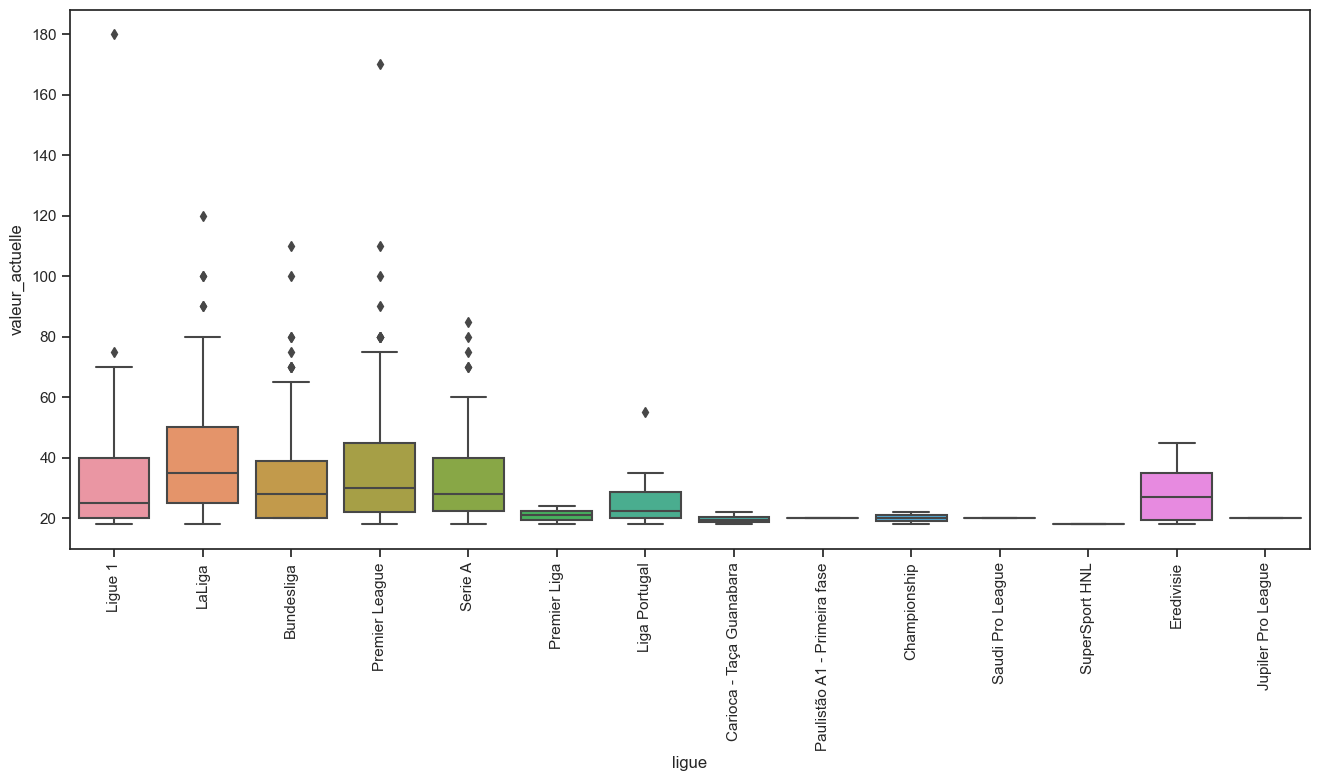

In [ ]:
plt.figure(figsize=(16, 7))
sns.set_theme(style="ticks", palette="Reds_r")
sns.boxplot(x="ligue", y="valeur_actuelle", data = joueur)
plt.xticks(rotation=90)

Text(0, 0.5, 'nombre')

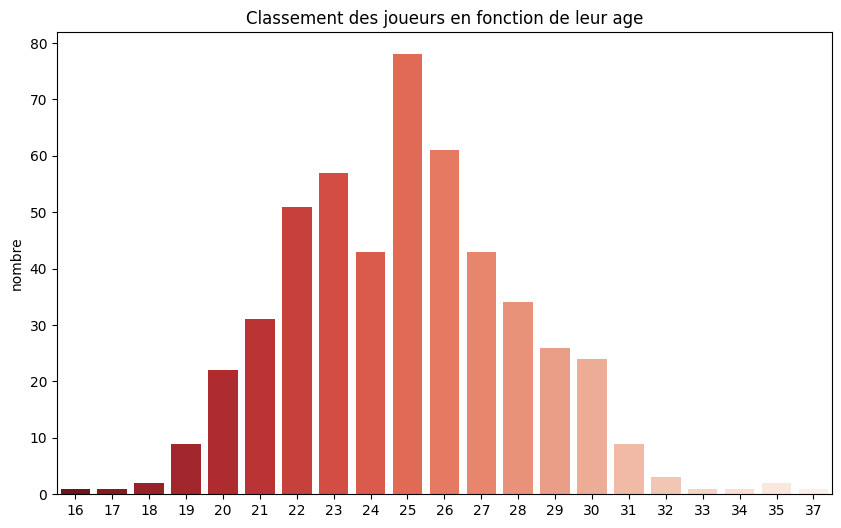

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Classement des joueurs en fonction de leur age")
sns.barplot(x=df_age_j.index, y=df_age_j, palette='Reds_r')
plt.ylabel("nombre")

Text(0, 0.5, 'nombre')

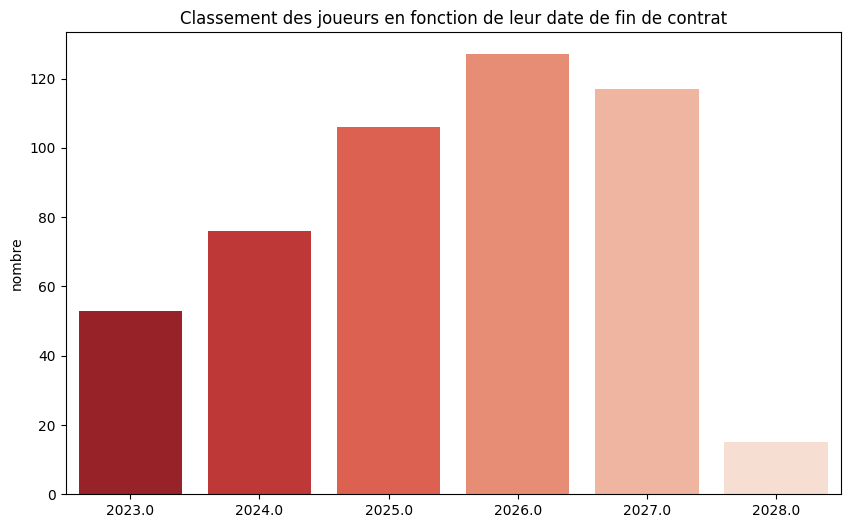

In [128]:
plt.figure(figsize=(10,6))
plt.title("Classement des joueurs en fonction de leur date de fin de contrat")
sns.barplot(x=df_contrat_j.index, y=df_contrat_j, palette='Reds_r')
plt.ylabel("nombre")

<AxesSubplot: >

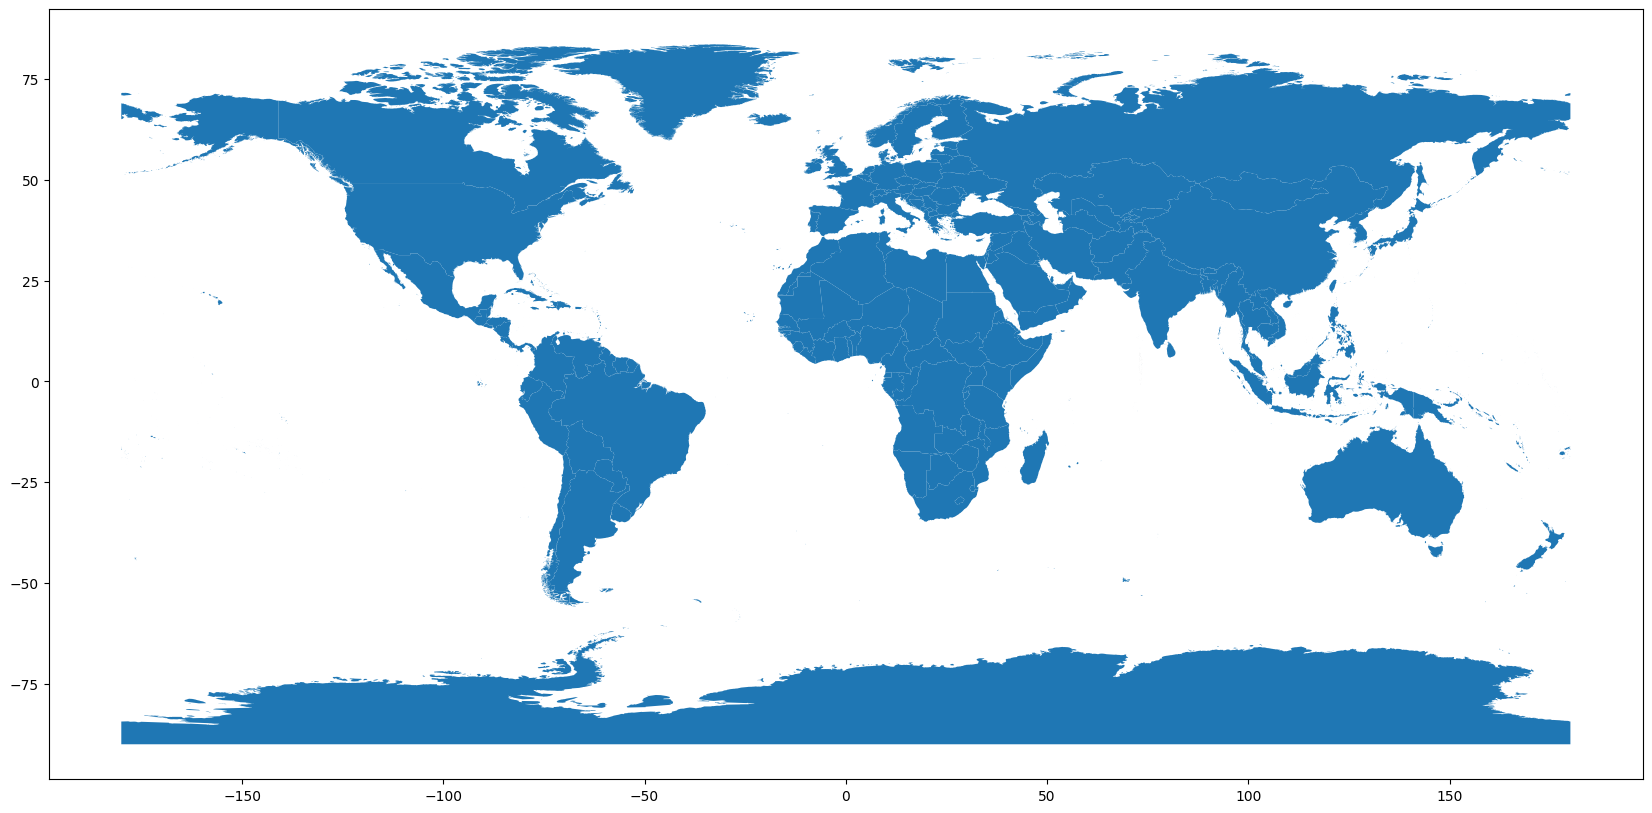

In [80]:
url = "https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson"
map = gpd.read_file(url)
map.plot(figsize=(25, 10))

488


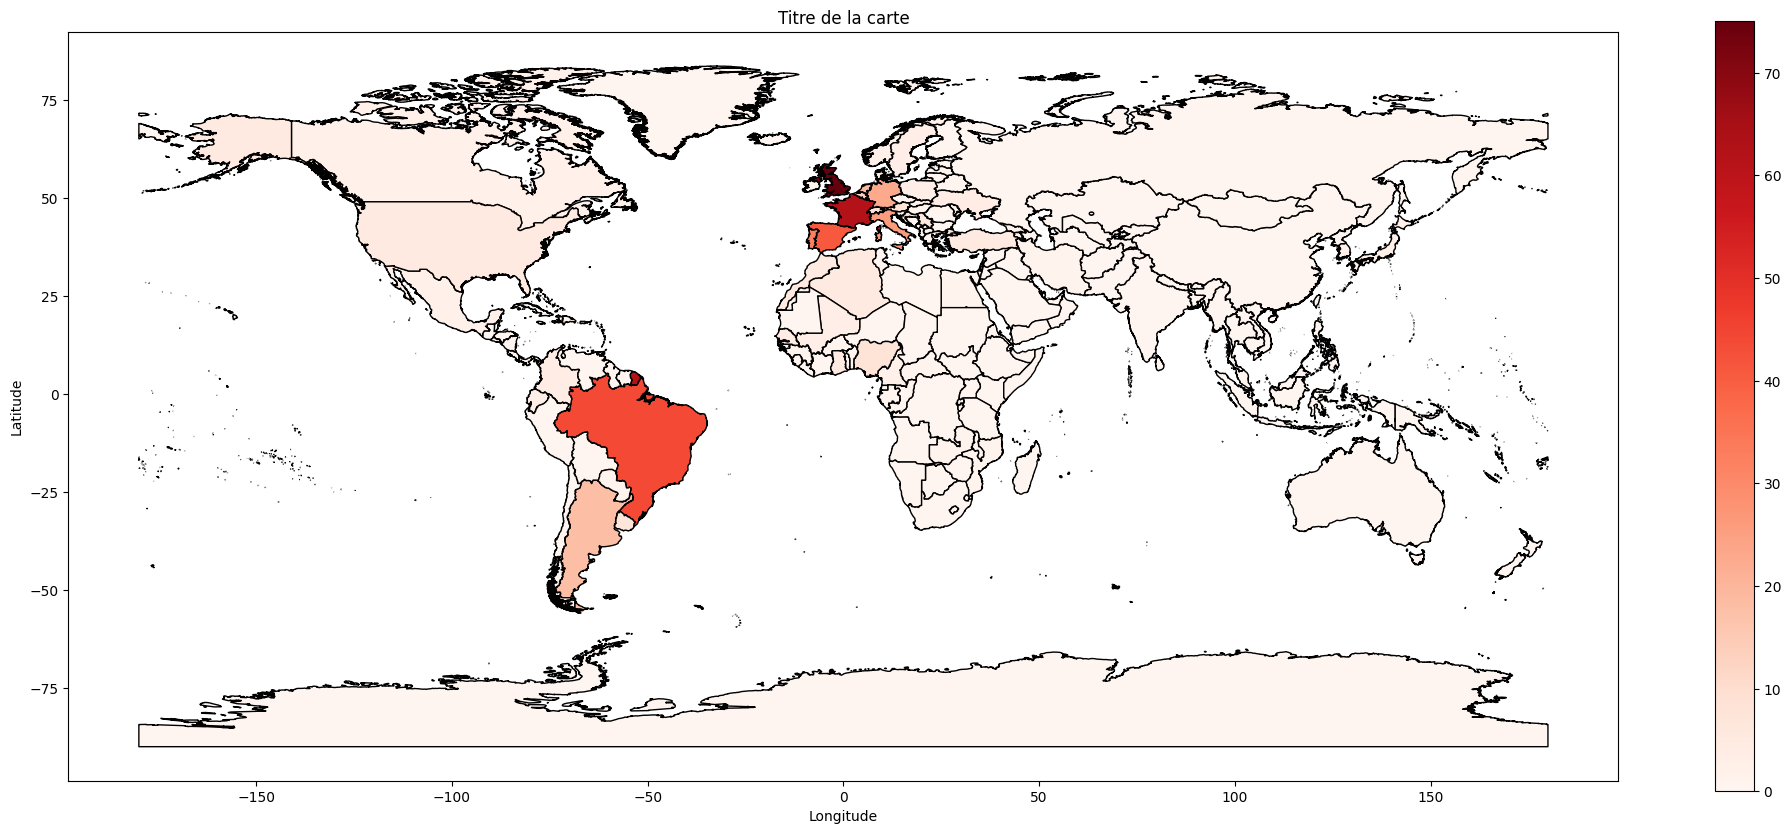

In [78]:
map['chiffres'] = 0
for index, value in df_country_j.items():
    map.loc[map['ADMIN'] == index, 'chiffres'] = value

map.plot(column = 'chiffres', figsize=(25, 10), legend=True, cmap='Reds', edgecolor = 'black')
plt.title("Titre de la carte")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
pays_zero = map.loc[map['chiffres'] == 0]
print(map['chiffres'].sum())

Text(268.09722222222223, 0.5, 'Latitude')

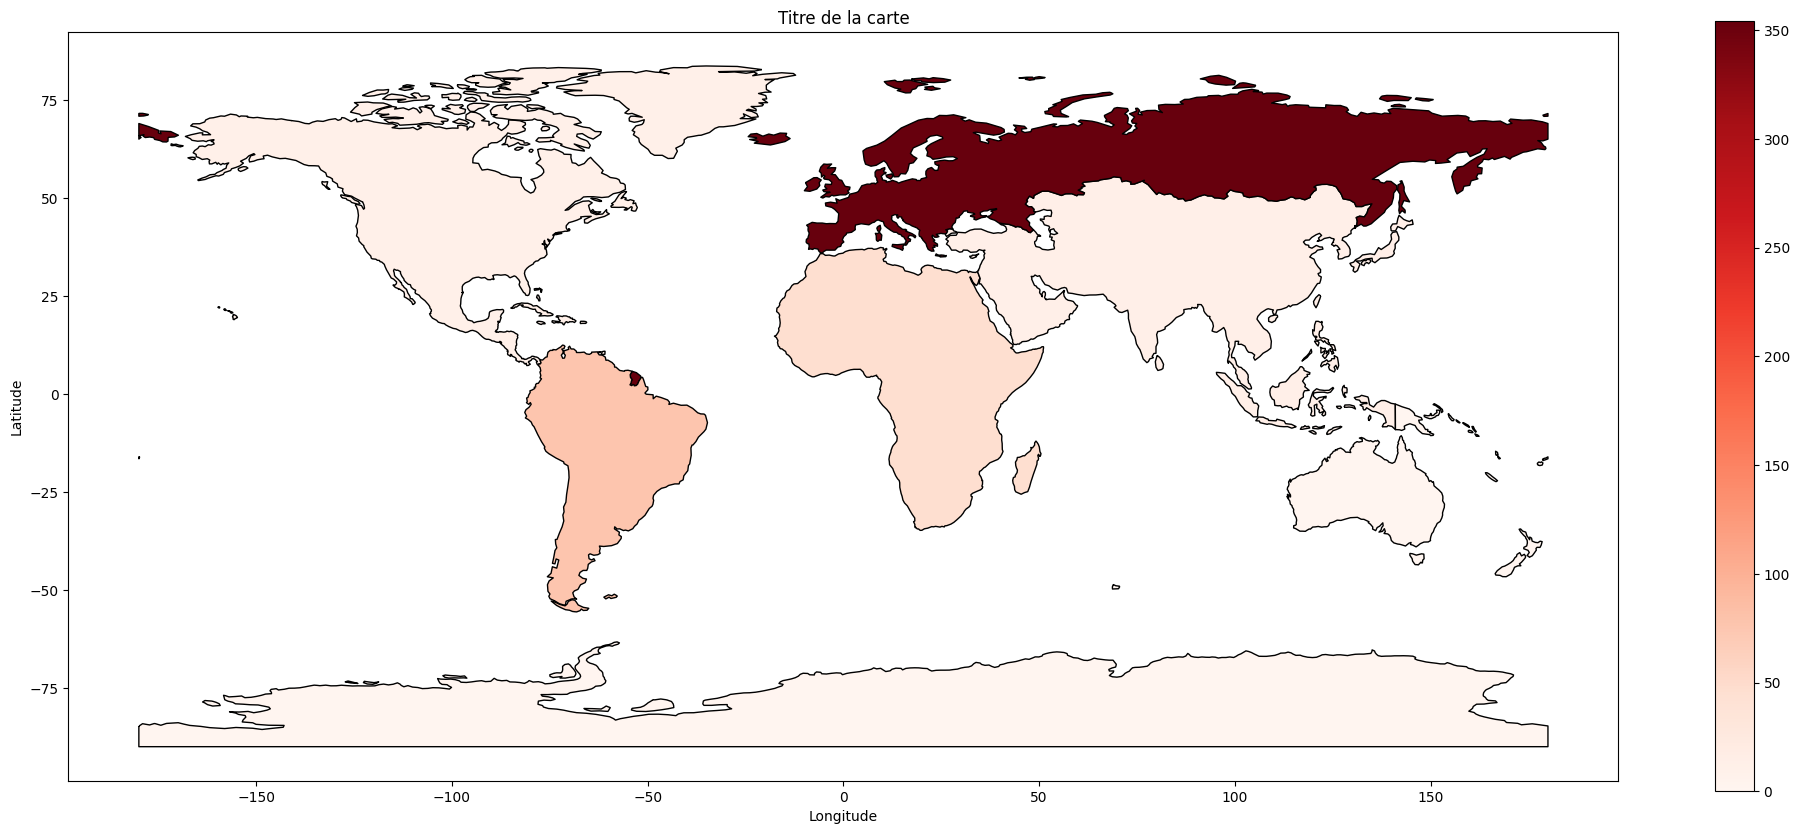

In [77]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[['continent', 'geometry']]
continents = world.dissolve(by='continent')

continents['chiffres'] = 0
continents['chiffres'] = continents.index.map(df_continent_j)
continents.fillna(0, inplace=True)
continents.plot(column = 'chiffres',
                figsize=(25, 10),
                legend=True,cmap='Reds',
                edgecolor = 'black')
plt.title("Titre de la carte")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

## Graphiques supplémentaires

Text(0.5, 1.0, 'Pourcentage de joueur par poste')

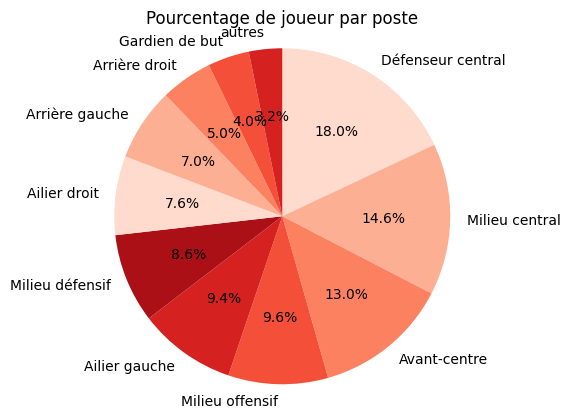

In [7]:
sns.set_palette("Reds")
plt.pie(df_poste_j, labels=df_poste_j.index, startangle=90, counterclock=False, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Pourcentage de joueur par poste")

Text(0.5, 1.0, 'Pourcetnage de joueur par année de fin de contrat')

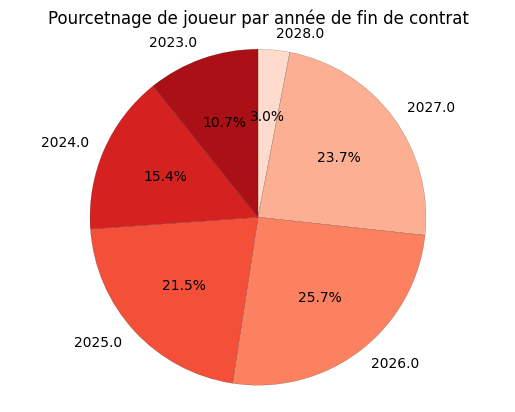

In [ ]:
sns.set_palette("Reds")
plt.pie(df_contrat_j, labels=df_contrat_j.index, startangle=90, counterclock=False, wedgeprops={'linewidth': 0.1, 'edgecolor': 'black'},autopct='%1.1f%%')
plt.axis('equal')
plt.title("Pourcetnage de joueur par année de fin de contrat")

Text(0, 0.5, 'nombre')

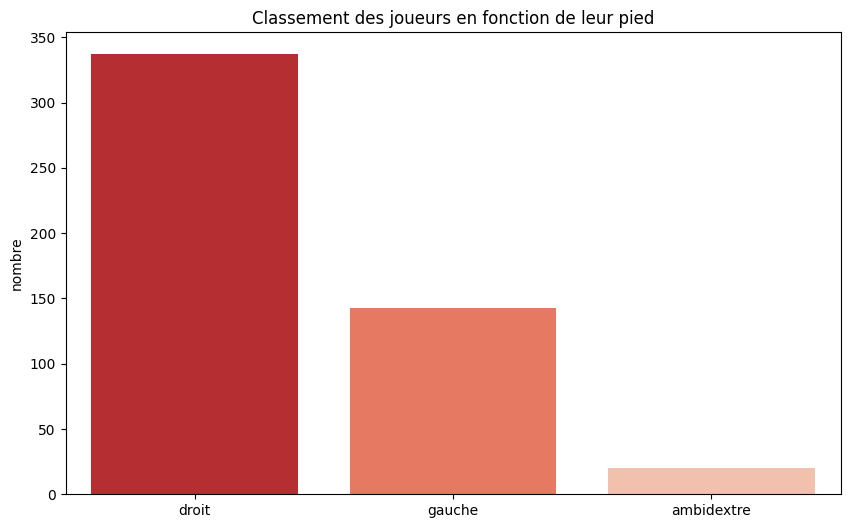

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Classement des joueurs en fonction de leur pied")
sns.barplot(x=df_pied_j.index, y=df_pied_j, palette='Reds_r')
plt.ylabel("nombre")

Text(0, 0.5, 'nombre')

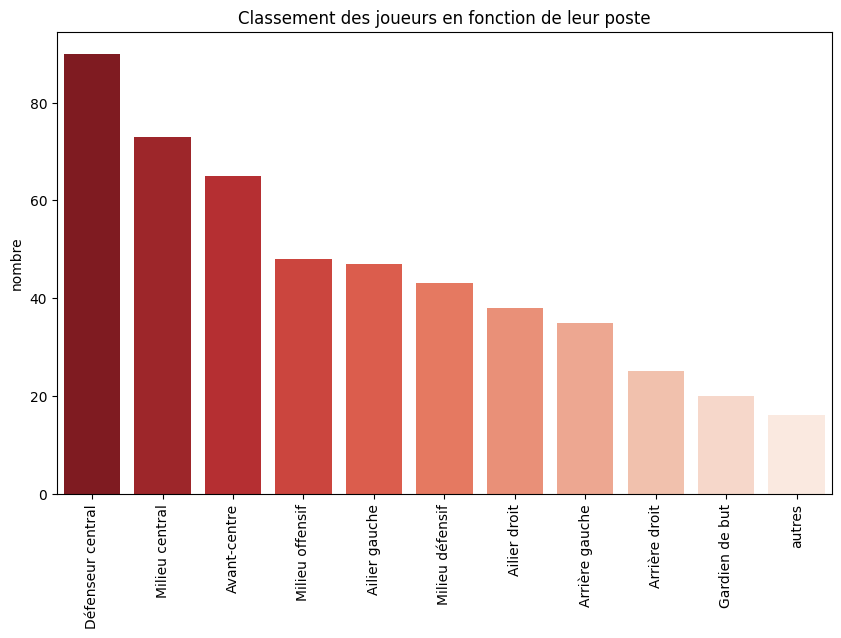

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Classement des joueurs en fonction de leur poste")
sns.barplot(x=df_poste_j.index, y=df_poste_j, palette='Reds_r')
plt.xticks(rotation=90)
plt.ylabel("nombre")

Text(0, 0.5, 'nombre')

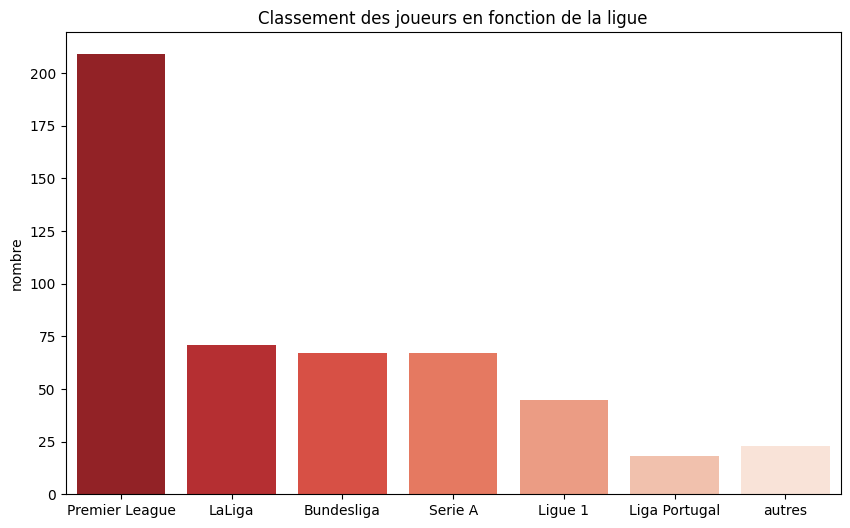

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Classement des joueurs en fonction de la ligue")
sns.barplot(x=df_ligue_j.index, y=df_ligue_j, palette='Reds_r')
plt.ylabel("nombre")

Text(0, 0.5, 'nombre')

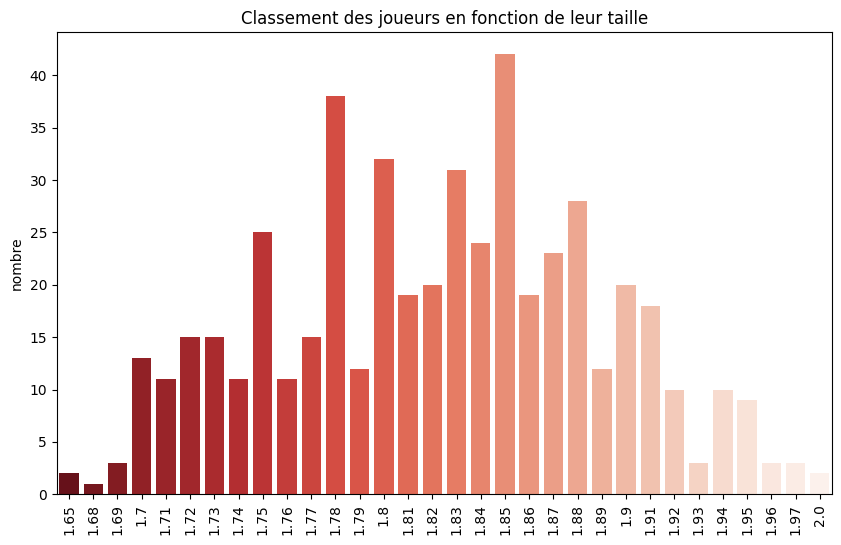

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Classement des joueurs en fonction de leur taille")
sns.barplot(x=df_taille_j.index, y=df_taille_j, palette='Reds_r')
plt.xticks(rotation=90)
plt.ylabel("nombre")

Text(0.5, 0.98, "Densité entre l'age et la taille des joueurs")

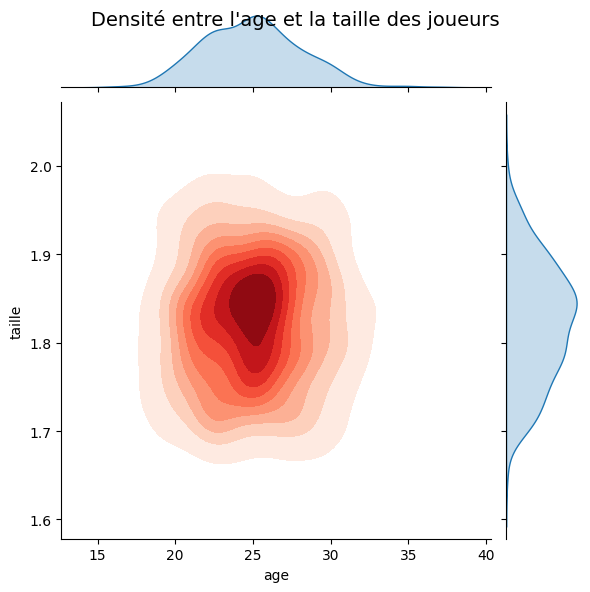

In [ ]:
sns.jointplot(x=joueur['age'], y=joueur['taille'], kind="kde", cmap="Reds", fill=True)
plt.suptitle("Densité entre l'age et la taille des joueurs", fontsize=14)

Text(0.5, 0.98, 'Densité entre le nb de selections et la nb de buts')

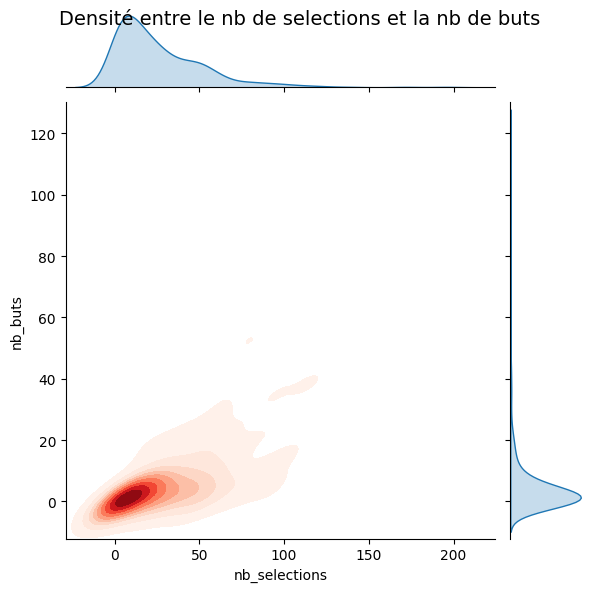

In [ ]:
sns.jointplot(x=joueur['nb_selections'], y=joueur['nb_buts'], kind="kde", cmap="Reds", fill=True)
plt.suptitle("Densité entre le nb de selections et la nb de buts", fontsize=14)

(0.0, 200.0)

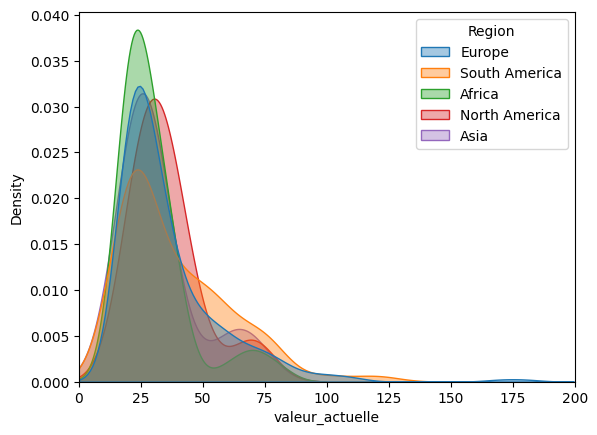

In [ ]:
sns.kdeplot(data=joueur, x="valeur_actuelle", hue="Region", fill=True, common_norm=False, alpha=0.4)
plt.xlim(0, 200)


(0.0, 230.0)

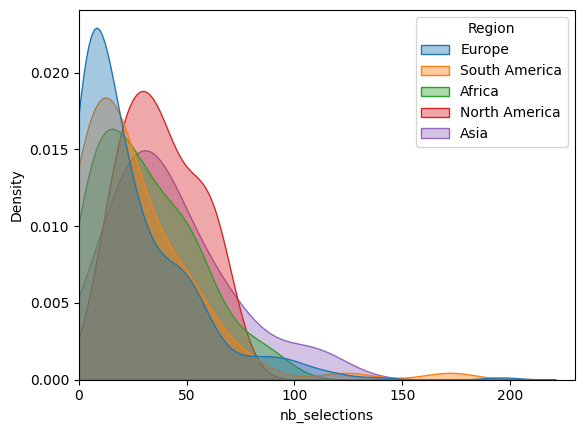

In [ ]:
sns.kdeplot(data=joueur, x="nb_selections", hue="Region", fill=True, common_norm=False, alpha=0.4)
plt.xlim(0, 230)


(0.0, 140.0)

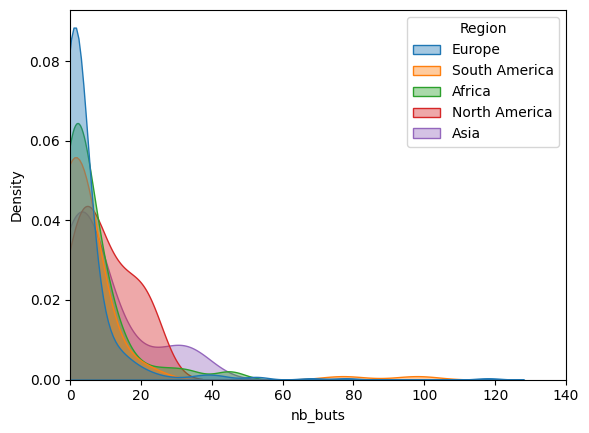

In [ ]:
sns.kdeplot(data=joueur, x="nb_buts", hue="Region", fill=True, common_norm=False, alpha=0.4)
plt.xlim(0, 140)

/var/folders/1z/2m76hnk913q9mvjmtv4d1tgw0000gn/T/ipykernel_1247/1185570470.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=joueur, x="nb_selections", hue="ligue", fill=True, common_norm=False, alpha=0.4)
/var/folders/1z/2m76hnk913q9mvjmtv4d1tgw0000gn/T/ipykernel_1247/1185570470.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=joueur, x="nb_selections", hue="ligue", fill=True, common_norm=False, alpha=0.4)
/var/folders/1z/2m76hnk913q9mvjmtv4d1tgw0000gn/T/ipykernel_1247/1185570470.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=joueur, x="nb_selections", hue="ligue", fill=True, common_norm=False, alpha=0.4)


(0.0, 140.0)

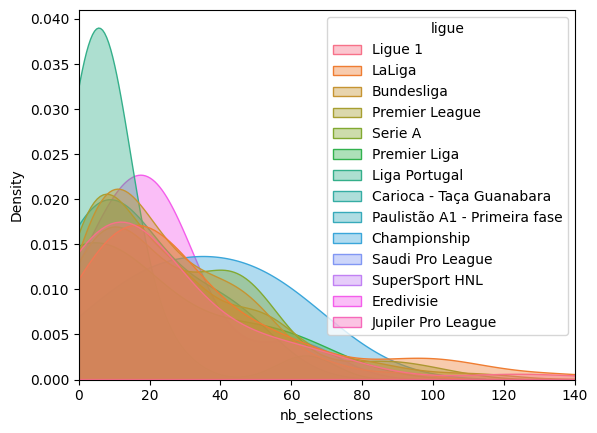

In [ ]:
sns.kdeplot(data=joueur, x="nb_selections", hue="ligue", fill=True, common_norm=False, alpha=0.4)
plt.xlim(0, 140)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Europe'),
  Text(1, 0, 'South America'),
  Text(2, 0, 'Africa'),
  Text(3, 0, 'North America'),
  Text(4, 0, 'Asia')])

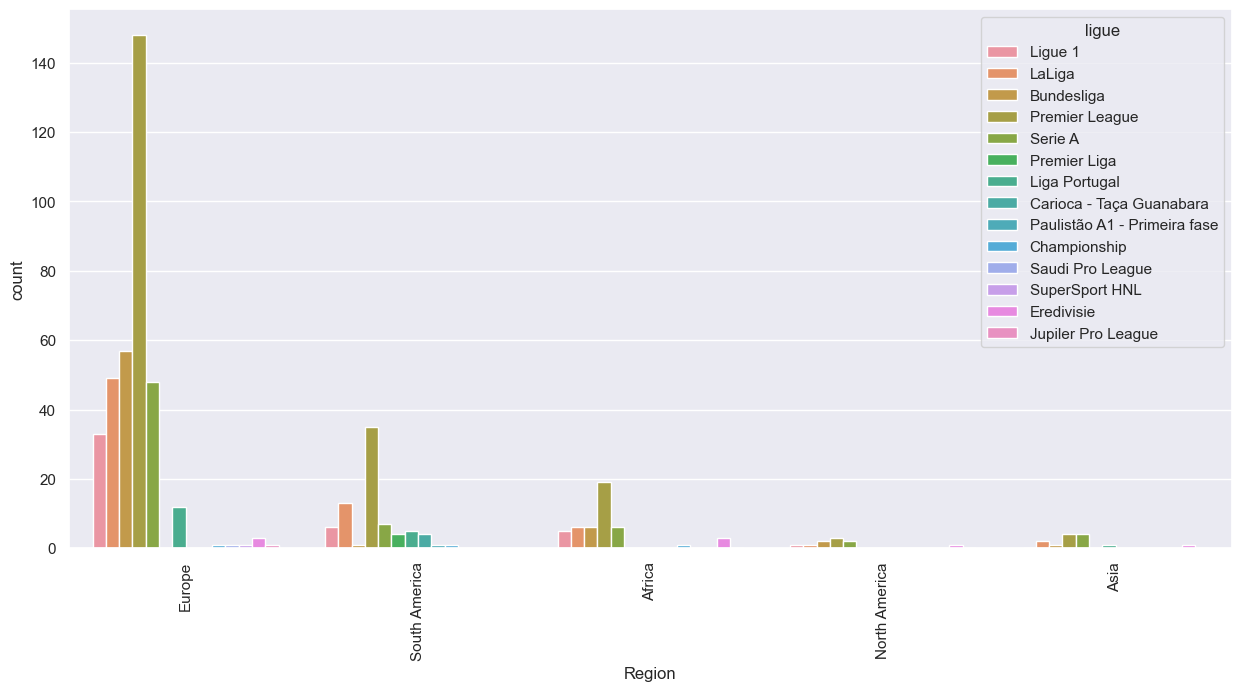

In [ ]:
plt.figure(figsize=(15,7))
sns.set_theme(style="darkgrid")
sns.countplot(x='Region', hue='ligue', data=joueur)
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Ligue 1'),
  Text(1, 0, 'LaLiga'),
  Text(2, 0, 'Bundesliga'),
  Text(3, 0, 'Premier League'),
  Text(4, 0, 'Serie A'),
  Text(5, 0, 'Premier Liga'),
  Text(6, 0, 'Liga Portugal'),
  Text(7, 0, 'Carioca - Taça Guanabara'),
  Text(8, 0, 'Paulistão A1 - Primeira fase'),
  Text(9, 0, 'Championship'),
  Text(10, 0, 'Saudi Pro League'),
  Text(11, 0, 'SuperSport HNL'),
  Text(12, 0, 'Eredivisie'),
  Text(13, 0, 'Jupiler Pro League')])

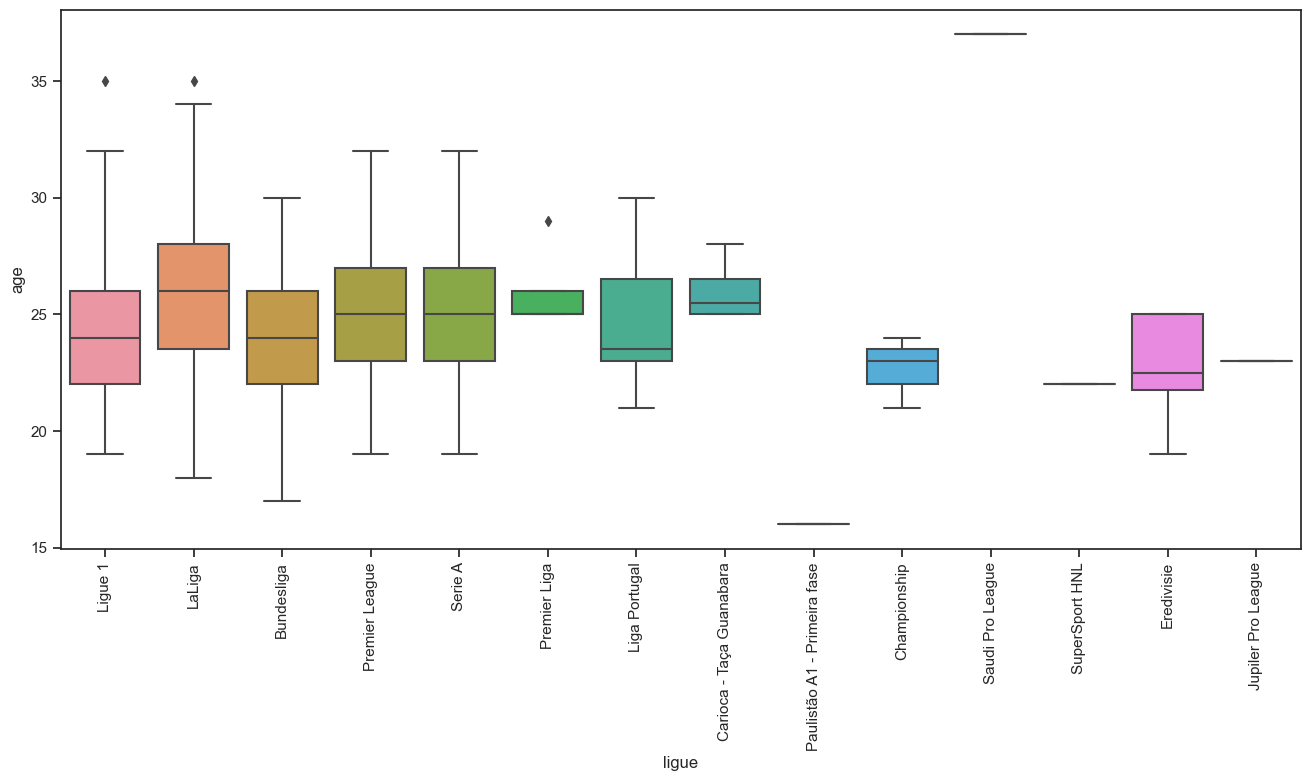

In [ ]:
plt.figure(figsize=(16, 7))
sns.set_theme(style="ticks", palette="Reds_r")
sns.boxplot(x="ligue", y="age", data = joueur)
plt.xticks(rotation=90)

Text(0.5, 0.98, "Diagrammes en boîte pour les différentes ligues en fonction de l'age")

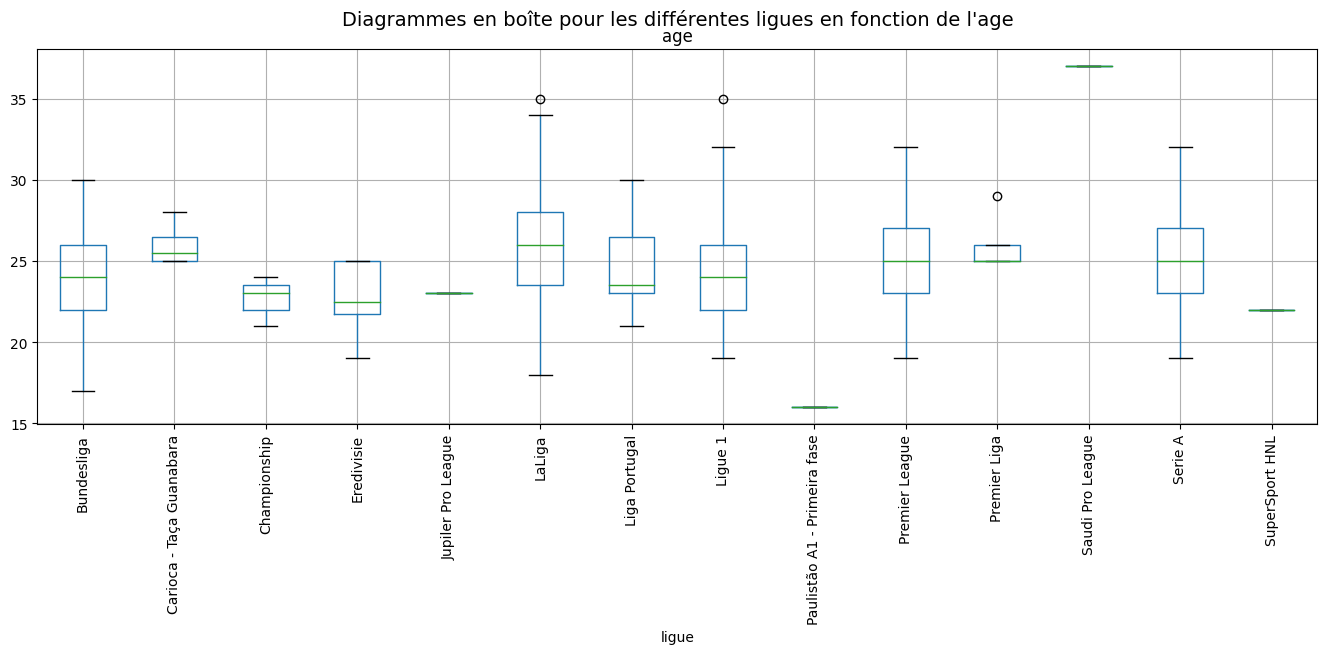

In [ ]:
axes = joueur.boxplot(column='age', by='ligue', figsize=(16,5))
plt.xticks(rotation=90)
plt.suptitle("Diagrammes en boîte pour les différentes ligues en fonction de l'age", fontsize=14)

Text(0.5, 0.98, 'Diagrammes en boîte pour les différentes ligues en fonction de la valeur actuelle')

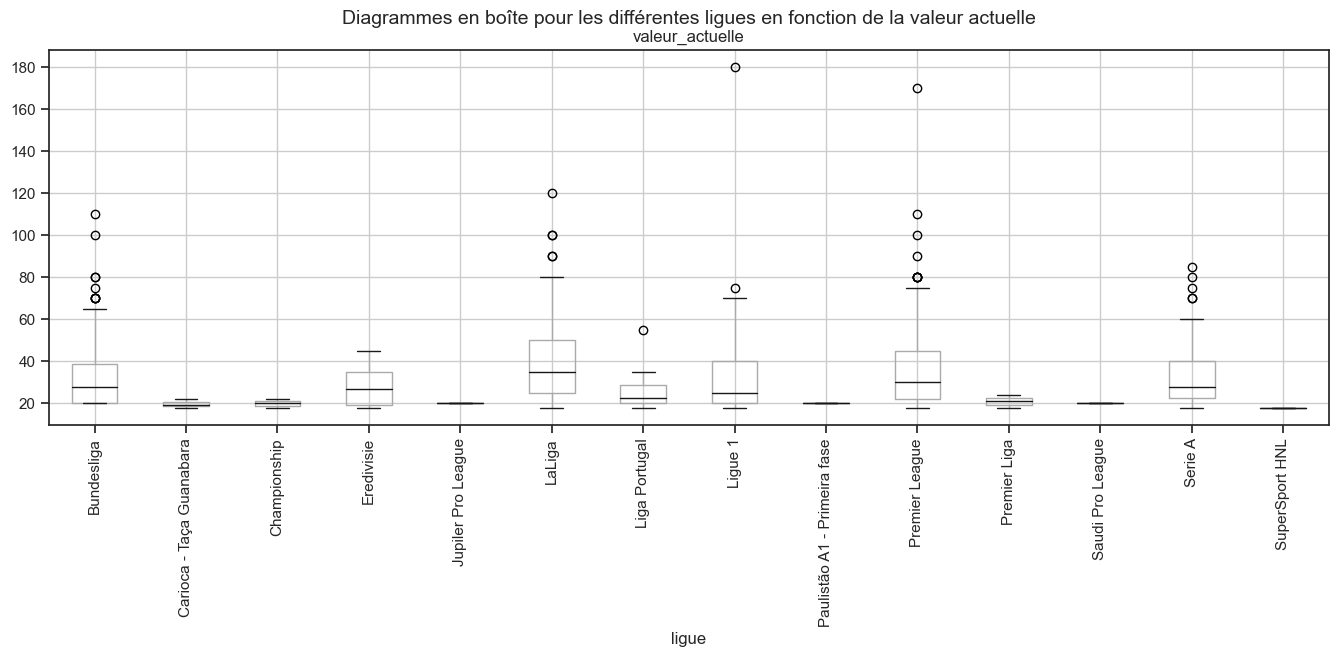

In [ ]:
axes = joueur.boxplot(column='valeur_actuelle', by='ligue', figsize=(16,5))
plt.xticks(rotation=90)
plt.suptitle("Diagrammes en boîte pour les différentes ligues en fonction de la valeur actuelle", fontsize=14)

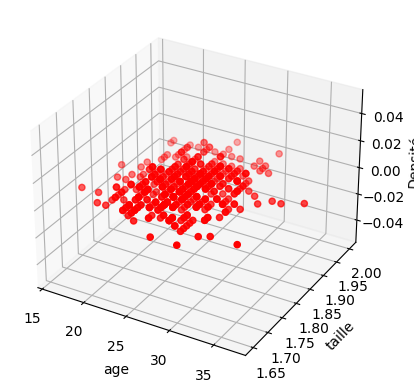

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(joueur['age'], joueur['taille'], c='r', marker='o')

ax.set_xlabel('age')
ax.set_ylabel('taille')
ax.set_zlabel('Densité')

plt.show()

/var/folders/1z/2m76hnk913q9mvjmtv4d1tgw0000gn/T/ipykernel_3928/452597694.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=joueur['age'], y=joueur['nb_selections'], palette='Reds_r')


Text(0, 0.5, 'nombre')

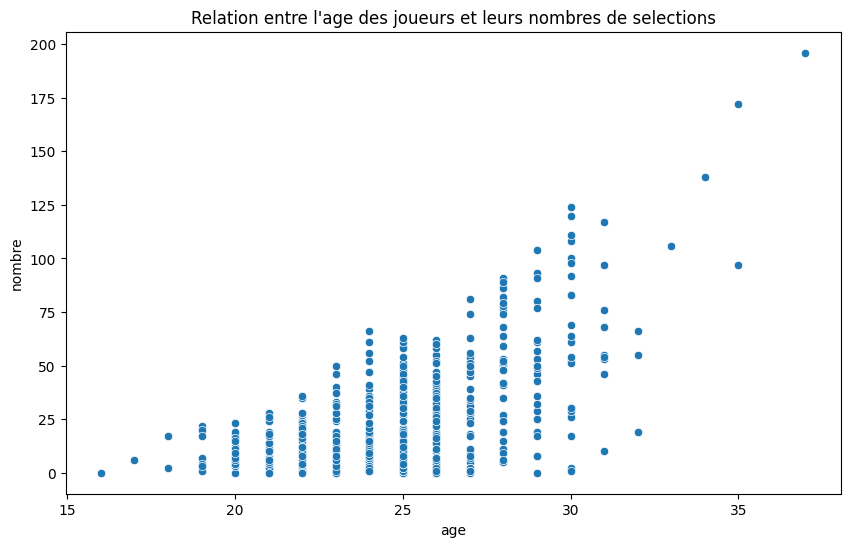

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Relation entre l'age des joueurs et leurs nombres de selections")
sns.scatterplot(x=joueur['age'], y=joueur['nb_selections'], palette='Reds_r')
plt.ylabel("nombre")

<AxesSubplot: title={'center': "Relation entre l'age des joueurs et leurs nombres de selections"}, xlabel='nb_selections', ylabel='nb_buts'>

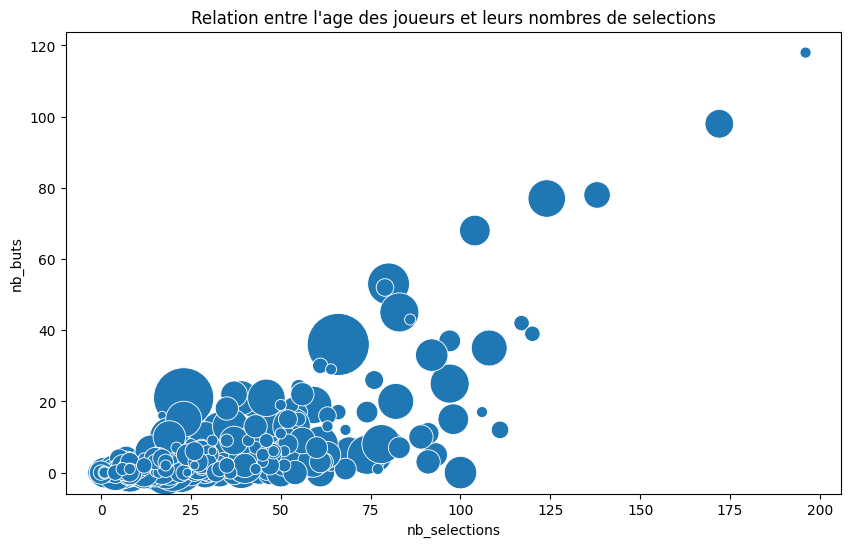

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Relation entre l'age des joueurs et leurs nombres de selections")
sns.scatterplot(data=joueur, x="nb_selections", y="nb_buts", size="valeur_actuelle", legend=False, sizes=(40, 2000))

/var/folders/1z/2m76hnk913q9mvjmtv4d1tgw0000gn/T/ipykernel_3790/4257622592.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=joueur['age'], y=joueur['nb_buts'], palette='Reds_r')


Text(0, 0.5, 'nombre')

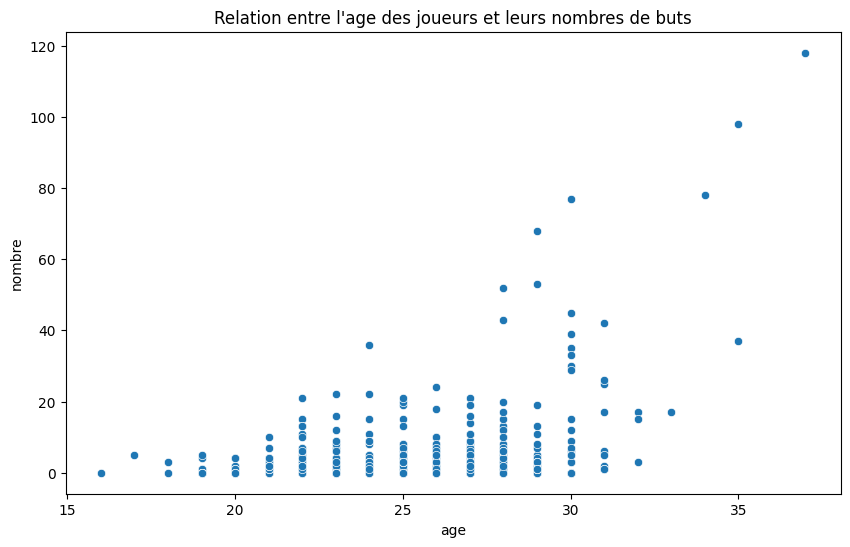

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Relation entre l'age des joueurs et leurs nombres de buts")
sns.scatterplot(x=joueur['age'], y=joueur['nb_buts'], palette='Reds_r')
plt.ylabel("nombre")

/var/folders/1z/2m76hnk913q9mvjmtv4d1tgw0000gn/T/ipykernel_3790/366088745.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=joueur['montant_transfert'], y=joueur['valeur_max'], palette='Reds_r')


Text(0, 0.5, 'nombre')

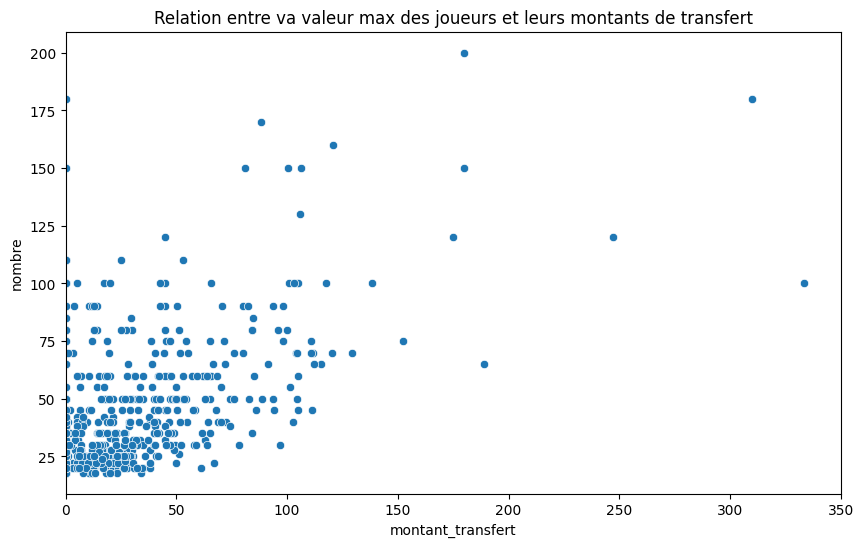

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Relation entre va valeur max des joueurs et leurs montants de transfert")
sns.scatterplot(x=joueur['montant_transfert'], y=joueur['valeur_max'], palette='Reds_r')
plt.xlim(0, 350)
plt.ylabel("nombre")

/var/folders/1z/2m76hnk913q9mvjmtv4d1tgw0000gn/T/ipykernel_3790/1946751167.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=joueur['nb_selections'], y=joueur['valeur_max'], palette='Reds_r')


Text(0, 0.5, 'nombre')

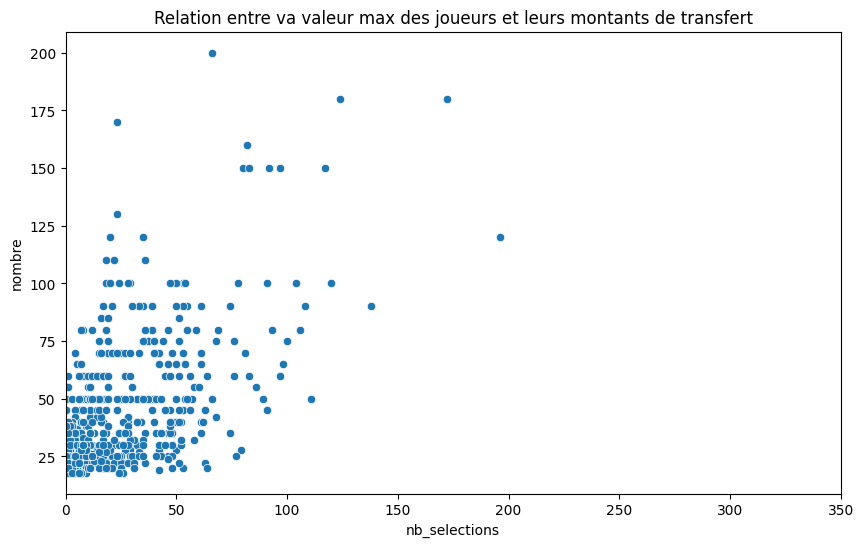

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Relation entre va valeur max des joueurs et le nombre de selections")
sns.scatterplot(x=joueur['nb_selections'], y=joueur['valeur_max'], palette='Reds_r')
plt.xlim(0, 350)
plt.ylabel("nombre")

/var/folders/1z/2m76hnk913q9mvjmtv4d1tgw0000gn/T/ipykernel_3910/4244877954.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=joueur['nb_selections'], y=joueur['nb_buts'], palette='Reds_r')


Text(0, 0.5, 'nombre')

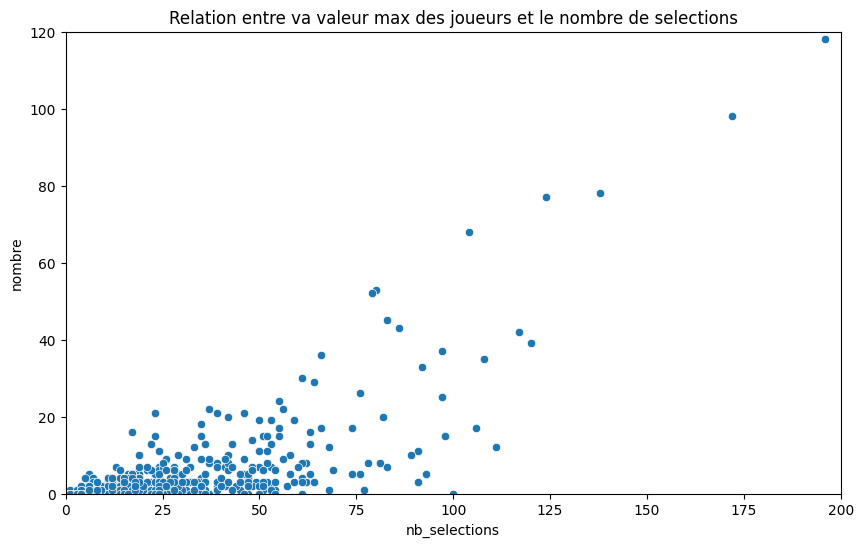

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Relation entre va valeur max des joueurs et le nombre de selections")
sns.scatterplot(x=joueur['nb_selections'], y=joueur['nb_buts'], palette='Reds_r')
plt.xlim(0, 200)
plt.ylim(0, 120)
plt.ylabel("nombre")

(0.0, 120.0)

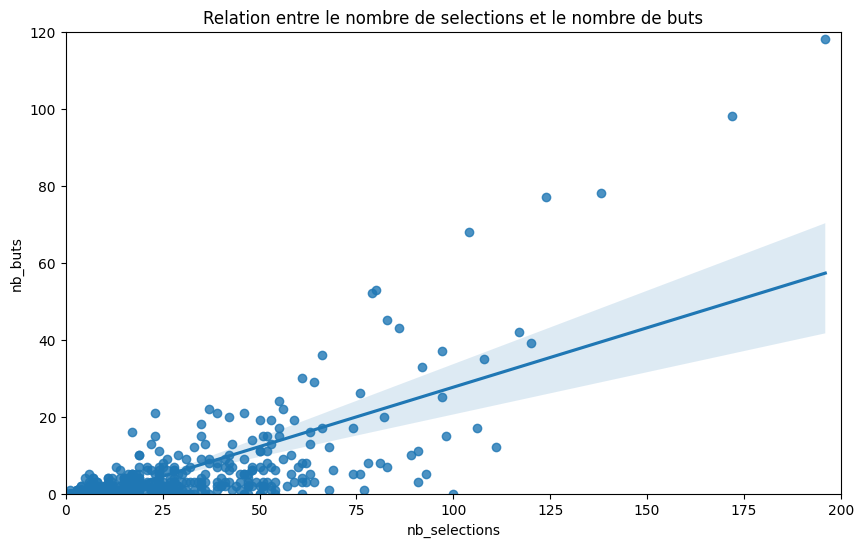

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Relation entre le nombre de selections et le nombre de buts")
sns.regplot(x=joueur['nb_selections'], y=joueur['nb_buts'], data=joueur)
plt.xlim(0, 200)
plt.ylim(0, 120)

/var/folders/1z/2m76hnk913q9mvjmtv4d1tgw0000gn/T/ipykernel_3790/3318706460.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=joueur['valeur_actuelle'], y=joueur['valeur_max'], palette='Reds_r')


Text(0, 0.5, 'nombre')

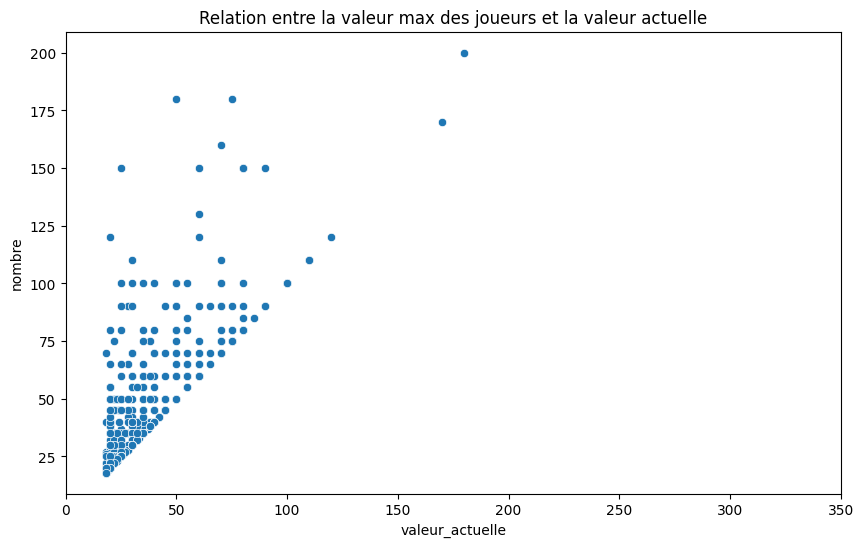

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Relation entre la valeur max des joueurs et la valeur actuelle")
sns.scatterplot(x=joueur['valeur_actuelle'], y=joueur['valeur_max'], palette='Reds_r')
plt.xlim(0, 350)
plt.ylabel("nombre")